In [1]:
import numpy as np
import pandas as pd

import os
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [2]:
#pip uninstall pandas_datareader


In [3]:
#pip install pandas_datareader

In [4]:
import pandas_datareader as web

In [5]:
df = pd.read_csv('MSFT.csv', parse_dates=['Date'])
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060524,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062686,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063767,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062145,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061065,47894400
...,...,...,...,...,...,...,...
9410,2023-07-17,345.679993,346.989990,342.200012,345.730011,345.730011,20363900
9411,2023-07-18,345.829987,366.779999,342.170013,359.489990,359.489990,64872700
9412,2023-07-19,361.750000,362.459991,352.440002,355.079987,355.079987,39732900
9413,2023-07-20,353.570007,357.970001,345.369995,346.869995,346.869995,33778400


In [6]:
#To simplify, we are only working with close attribute
df1=df['Close']
df1

0         0.097222
1         0.100694
2         0.102431
3         0.099826
4         0.098090
           ...    
9410    345.730011
9411    359.489990
9412    355.079987
9413    346.869995
9414    343.769989
Name: Close, Length: 9415, dtype: float64

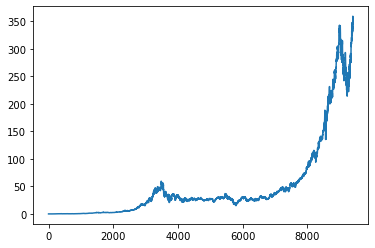

In [7]:
#Plotting the data
#import matplotlib.pyplot as plt
plt.plot(df1)

In [8]:
#LSTM are sensitive to the scale of data.Hence, Perform Scaling
#import numpy as np
#from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [9]:
# Set the number of days used for prediction
prediction_days = 60

In [10]:
# Initialize empty lists for training data input and output
x_data = []
y_data= []

In [11]:
# Iterate through the scaled data, starting from the prediction_days index
for x in range(prediction_days, len(scaled_data)):
    # Append the previous 'prediction_days' values to x_train
    x_data.append(scaled_data[x - prediction_days:x, 0])
    # Append the current value to y_train
    y_data.append(scaled_data[x, 0])

In [12]:
# Convert the list x_data to a NumPy array
x_data_np = np.array(x_data)

# Now you can access the shape attribute of the NumPy array
print(x_data_np.shape)

(9355, 60)


In [13]:
# Convert the list x_data to a NumPy array
y_data_np = np.array(y_data)

# Now you can access the shape attribute of the NumPy array
print(y_data_np.shape)

(9355,)


In [14]:
y_data

[6.521151580666823e-05,
 6.521151580666823e-05,
 6.521151580666823e-05,
 5.313582443827893e-05,
 5.313582443827893e-05,
 5.072068616460108e-05,
 5.555096271195678e-05,
 5.313582443827893e-05,
 5.072068616460108e-05,
 5.1928255301440004e-05,
 5.555096271195678e-05,
 5.313582443827893e-05,
 4.830554789092323e-05,
 3.8644994796211774e-05,
 3.6229856522533924e-05,
 4.589040961724538e-05,
 4.589040961724538e-05,
 4.589040961724538e-05,
 5.072068616460108e-05,
 3.8644994796211774e-05,
 3.139957997517822e-05,
 1.932110618942291e-05,
 1.2075691368389305e-05,
 1.932110618942291e-05,
 1.5698398778906135e-05,
 1.932110618942291e-05,
 2.8981659284134365e-05,
 3.381471824885602e-05,
 3.6229856522533924e-05,
 3.6229856522533924e-05,
 4.589040961724538e-05,
 3.8644994796211774e-05,
 4.830554789092323e-05,
 5.072068616460108e-05,
 4.3475271343567474e-05,
 3.6229856522533924e-05,
 2.656652101045646e-05,
 2.4151382736778664e-05,
 2.173624446310076e-05,
 2.173624446310076e-05,
 1.932110618942291e-05,
 1.

In [15]:
# Convert the x_train and y_train lists to numpy arrays
x_data, y_data = np.array(x_data), np.array(y_data)

In [16]:
# Decide on the percentage split (e.g., 80% for training, 20% for testing)
train_percentage = 0.8

# Calculate the index to split the data
split_index = int(train_percentage * len(x_data))

# Split the data into training and testing sets
x_train = x_data[:split_index]
y_train = y_data[:split_index]
x_test = x_data[split_index:]
y_test = y_data[split_index:]

print(f"X_train shape: {x_train.shape}")
print(f"Y_train shape: {y_train.shape}")
print(f"X_test shape: {x_test.shape}")
print(f"Y_test shape: {y_test.shape}")

X_train shape: (7484, 60)
Y_train shape: (7484,)
X_test shape: (1871, 60)
Y_test shape: (1871,)


In [17]:
# Convert the x_train and y_train lists to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [18]:
# Reshape x_train to a 3D array with the appropriate dimensions for the LSTM model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [19]:
def LSTM_model():
    """
    Create and configure an LSTM model for stock price prediction.

    :return: The configured LSTM model (keras.Sequential)
    """

    # Initialize a sequential model
    model = Sequential()

    # Add the first LSTM layer with 50 units, input shape, and return sequences
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a second LSTM layer with 50 units and return sequences
    model.add(LSTM(units=50, return_sequences=True))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a third LSTM layer with 50 units
    model.add(LSTM(units=50))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a dense output layer with one unit
    model.add(Dense(units=1))

    return model

In [20]:
model = LSTM_model()
model.summary()
model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

In [21]:
# Save weights only for best model
checkpointer = ModelCheckpoint(
    filepath = 'weights_best.hdf5',
    verbose = 2,
    save_best_only = True
)

model.fit(
    x_train,
    y_train,
    epochs=25,
    batch_size = 32,
    callbacks = [checkpointer]
)

Epoch 1/25
234/234 [==============================] - 27s 86ms/step - loss: 1.4674e-04
Epoch 2/25
234/234 [==============================] - 16s 69ms/step - loss: 4.8126e-05
Epoch 3/25
234/234 [==============================] - 16s 67ms/step - loss: 3.9485e-05
Epoch 4/25
234/234 [==============================] - 16s 70ms/step - loss: 3.4154e-05
Epoch 5/25
234/234 [==============================] - 16s 68ms/step - loss: 3.2827e-05
Epoch 6/25
234/234 [==============================] - 16s 68ms/step - loss: 2.7679e-05
Epoch 7/25
234/234 [==============================] - 16s 70ms/step - loss: 2.8064e-05
Epoch 8/25
234/234 [==============================] - 16s 70ms/step - loss: 2.7231e-05
Epoch 9/25
234/234 [==============================] - 16s 70ms/step - loss: 2.6162e-05
Epoch 10/25
234/234 [==============================] - 16s 68ms/step - loss: 2.6737e-05
Epoch 11/25
234/234 [==============================] - 16s 70ms/step - loss: 2.4632e-05
Epoch 12/25
234/234 [====================

In [22]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [23]:
# Generate price predictions using the LSTM model
predicted_prices = model.predict(x_test)

# Invert the scaling applied to the predicted prices to obtain actual values
predicted_prices = scaler.inverse_transform(predicted_prices)


59/59 [==============================] - 4s 27ms/step


In [24]:
actual_prices = y_test

# Reshape predicted_prices to make it 1D
predicted_prices_1d = np.squeeze(predicted_prices)
#print(type(actual_prices)==type(predicted_prices)
print(actual_prices.shape)
print(predicted_prices_1d.shape)

(1871,)
(1871,)


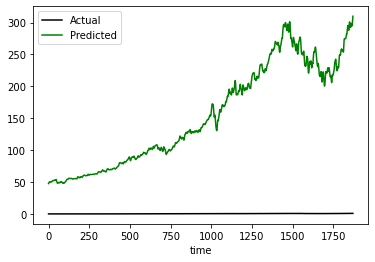

In [25]:
# Plot the actual prices using a black line
plt.plot(actual_prices, color='black', label=f"Actual")

# Plot the predicted prices using a green line
plt.plot(predicted_prices_1d, color='green', label=f"Predicted")

# Set the title of the plot using the company name
#plt.title(f"{COMPANY} share price")

# Set the x-axis label as 'time'
plt.xlabel("time")

# Set the y-axis label using the company name
#plt.ylabel(f"{Close} ")

# Display a legend to differentiate the actual and predicted prices
plt.legend()

# Show the plot on the screen
plt.show()

In [32]:
print("Actual Prices Shape:", actual_prices.shape)
print("Predicted Prices Shape:", predicted_prices_1d.shape)


Actual Prices Shape: (1871,)
Predicted Prices Shape: (1871,)


In [26]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

59/59 [==============================] - 2s 35ms/step


In [27]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.0029882544330781654

In [28]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

0.053372185950638876

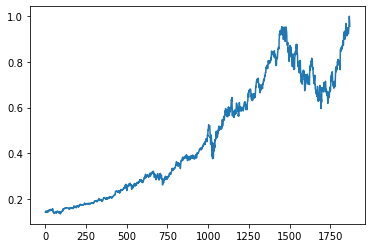

In [29]:
plt.plot(actual_prices)

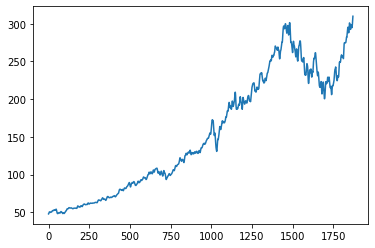

In [30]:
plt.plot(predicted_prices_1d)